In [35]:
# Librerías a implementar:

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Problema:

El dataset de casas de California. Es un conjunto de datos que contiene información sobre los precios medios de las viviendas y otras características de los distritos de California, basado en el censo de 1990.



**longitude**: es la longitud del centroide del distrito, expresada en grados. Esta variable indica la posición geográfica del distrito en el mapa.

**latitude**: es la latitud del centroide del distrito, expresada en grados. Esta variable también indica la posición geográfica del distrito en el mapa.

**housing_median_age**: es la edad media de las casas en el distrito, expresada en años. Esta variable refleja el estado y la antigüedad de las viviendas en el distrito.

**total_rooms**: es el número total de habitaciones en el distrito, sin distinguir entre tipos de habitaciones. Esta variable refleja el tamaño y la capacidad de las viviendas en el distrito.

**total_bedrooms**: es el número total de dormitorios en el distrito. Esta variable refleja el número de espacios destinados al descanso en las viviendas del distrito.

**population**: es el número de personas que viven en el distrito. Esta variable refleja la densidad y la demanda de vivienda en el distrito.


**households**: es el número de hogares en el distrito. Un hogar es un grupo de personas que residen dentro de una casa. Esta variable refleja la estructura y la composición de las familias en el distrito.


**median_income**: es el ingreso medio por hogar en el distrito, expresado en miles de dólares ($1000). Esta variable refleja el nivel socioeconómico y el poder adquisitivo de los habitantes del distrito.


**median_house_value**: es el valor medio de las casas en el distrito, expresado en cientos de miles de dólares ($100,000). Esta variable es la variable objetivo que se quiere predecir. Refleja el precio y la calidad de las viviendas en el distrito.


1. Leer el dataframe en formato csv en la dirección

In [36]:
df1 = pd.read_csv('https://raw.githubusercontent.com/hernansalinas/Curso_aprendizaje_estadistico/main/datasets/Sesion_07_housing.csv')
df1.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


2. Entender el estado de los datos, para ello puede emplear los comandos básicos de pandas

In [37]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [38]:
df1.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [39]:
df1.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

Dado que hay valores nulos en la columna total_bedrooms, procedemos a eliminarlos

In [40]:
df = df1.dropna(axis=0).copy() # Se crea una copia de los datos y se eliminan los valores nulos
df.isnull().sum()  # Mostramos la cantidad de valores nulos en el dataframe df

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

3. Determinar los elementos únicos dentro de la columna ocean_proximity

In [41]:
unique_values_OP = df['ocean_proximity'].unique()
unique_values_OP

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

4. Para las columnas

```python
cols = ["housing_median_age",	"total_rooms",	"total_bedrooms",	"population",	"households",	"median_income",	"median_house_value"]
```

Determinar el promedio de cada una de las columnas asociado a cada elementos unico de ocean_proximity, intenta con la operación groupby.


In [42]:
cols = np.array(df.columns)[2:-1] # Extraemos las columnas que solicitan
df.groupby('ocean_proximity')[cols].mean(numeric_only=True)

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
ocean_proximity,,,,,,,
<1H OCEAN,29.277397,2627.233451,546.539185,1518.440447,517.419083,4.231101,240267.990812
INLAND,24.262623,2721.252925,533.881619,1392.411484,478.006927,3.210359,124896.863147
ISLAND,42.400000,1574.600000,420.400000,668.000000,276.600000,2.744420,380440.000000
NEAR BAY,37.756388,2490.335242,514.182819,1227.881057,487.236123,4.175647,259279.292070
NEAR OCEAN,29.314688,2587.165525,538.615677,1355.637367,501.528919,4.006374,249042.355023


5. Construye un histograma para cada columna, puede emplear la libreria de seaborn.

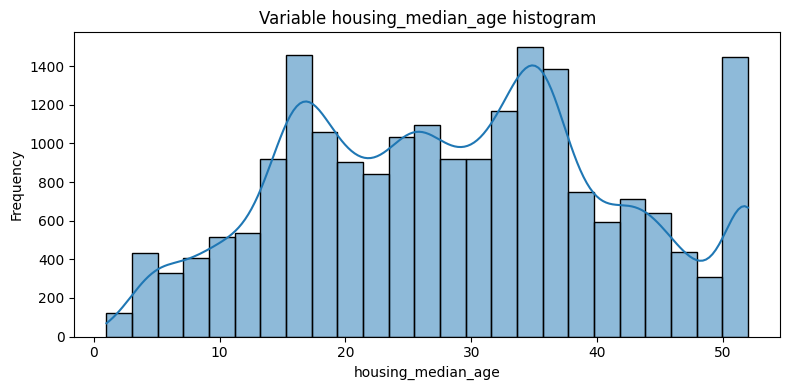

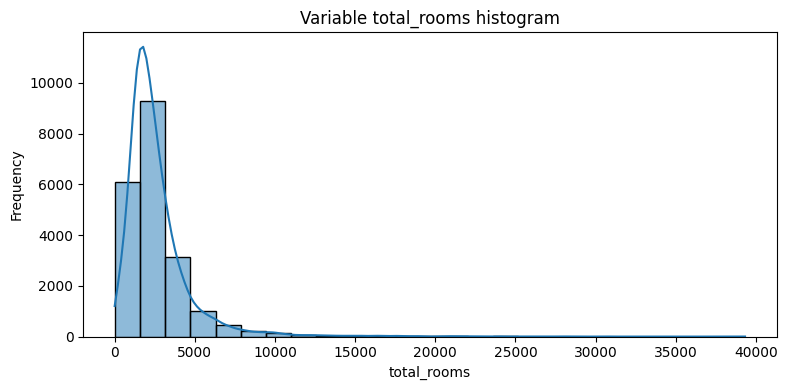

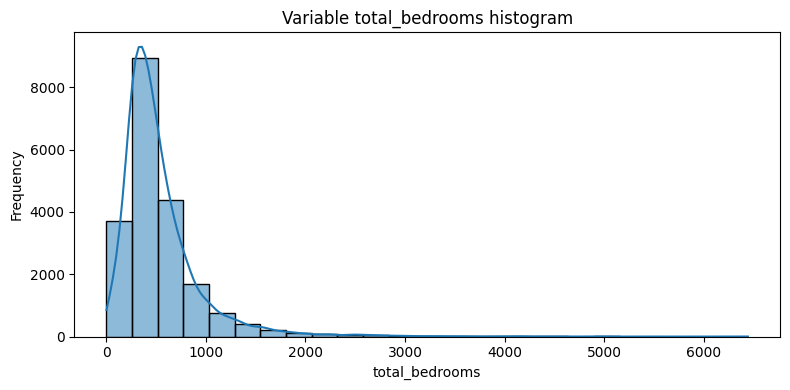

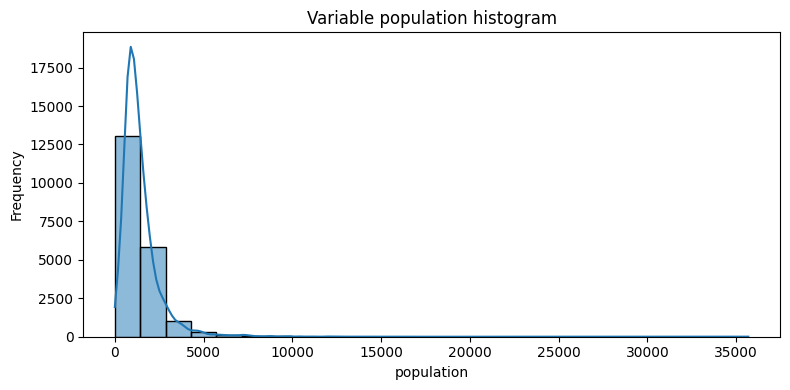

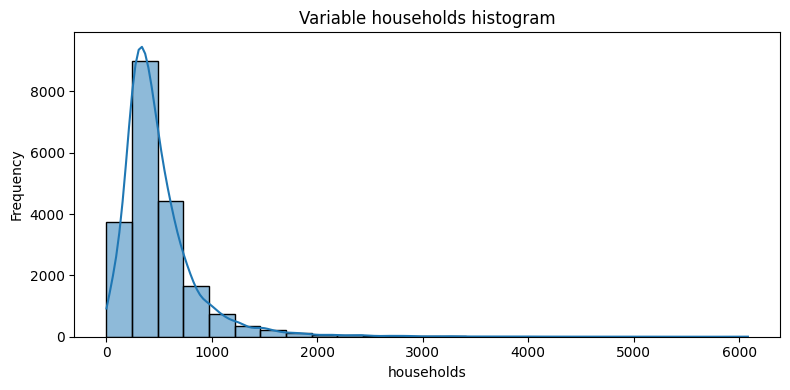

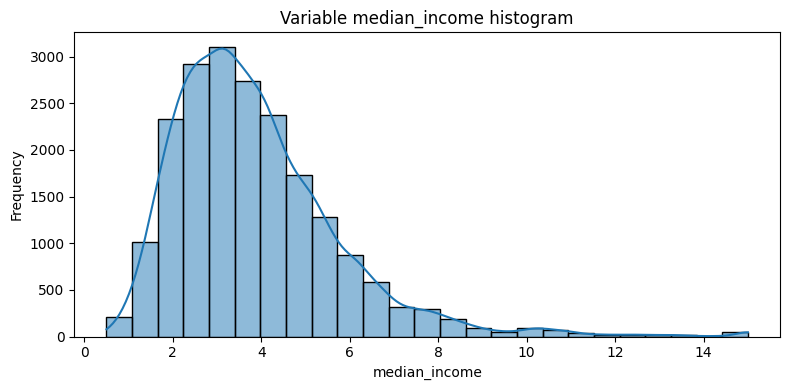

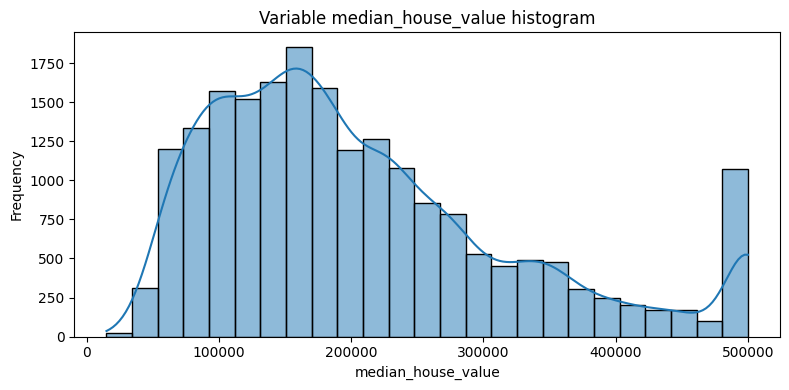

In [43]:
for col in cols:
    plt.figure(figsize=(8,4))
    sns.histplot(data=df, x=col, kde=True, bins=25)
    plt.title(f'Variable {col} histogram')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

6. Filtramos los datos atípicos en las columnas

In [44]:
def filter_outliers(df, cols):
    df_clean = pd.DataFrame()
    for group_name, group_df in df.groupby('ocean_proximity'):
        condition = pd.Series(True, index=group_df.index)
        for col in cols:
            Q1 = group_df[col].quantile(0.25)
            Q3 = group_df[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            condition = condition & (group_df[col] >= lower_bound) & (group_df[col] <= upper_bound)

        group_df_filtered = group_df[condition]
        df_clean = pd.concat([df_clean, group_df_filtered], ignore_index=True)
    return df_clean

#Evaluacion
df = filter_outliers(df, cols)

7. Empleando el siguiente codigo realiza el gráfico boxplot

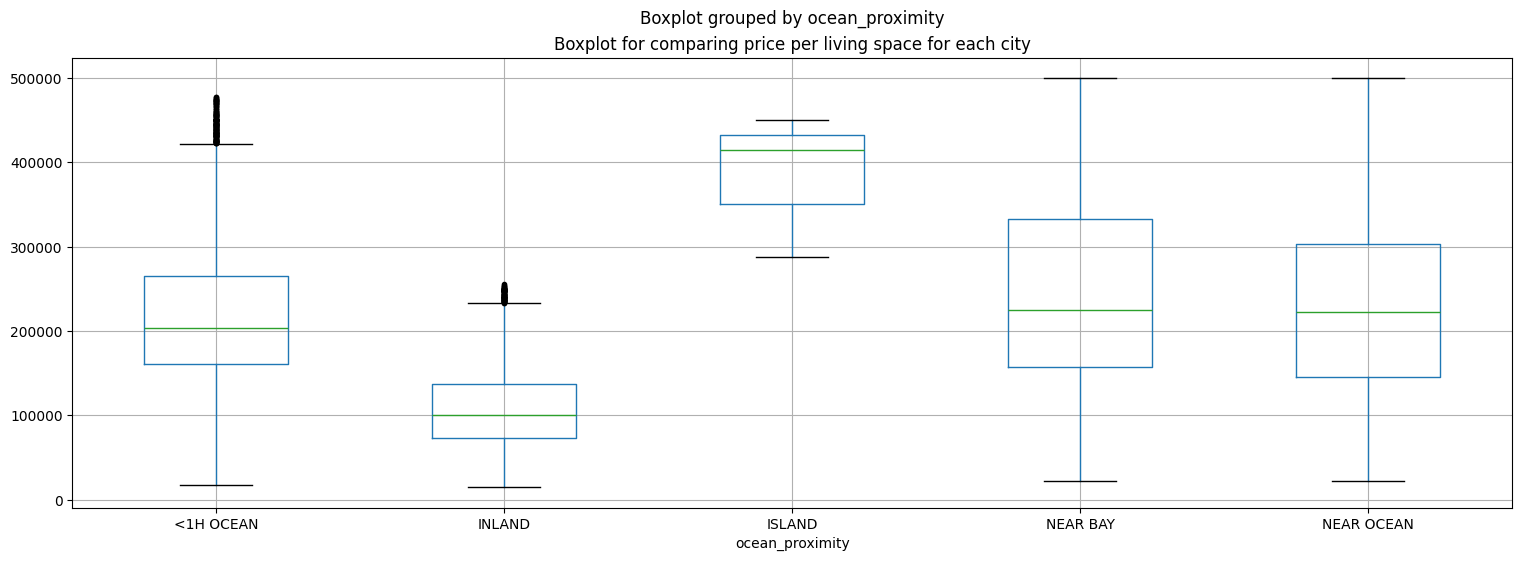

In [45]:
#Gráfica
df.boxplot(column="median_house_value", by='ocean_proximity', sym = 'k.', figsize=(18,6))
plt.title('Boxplot for comparing price per living space for each city')
plt.show()

8. Matriz de correlación:

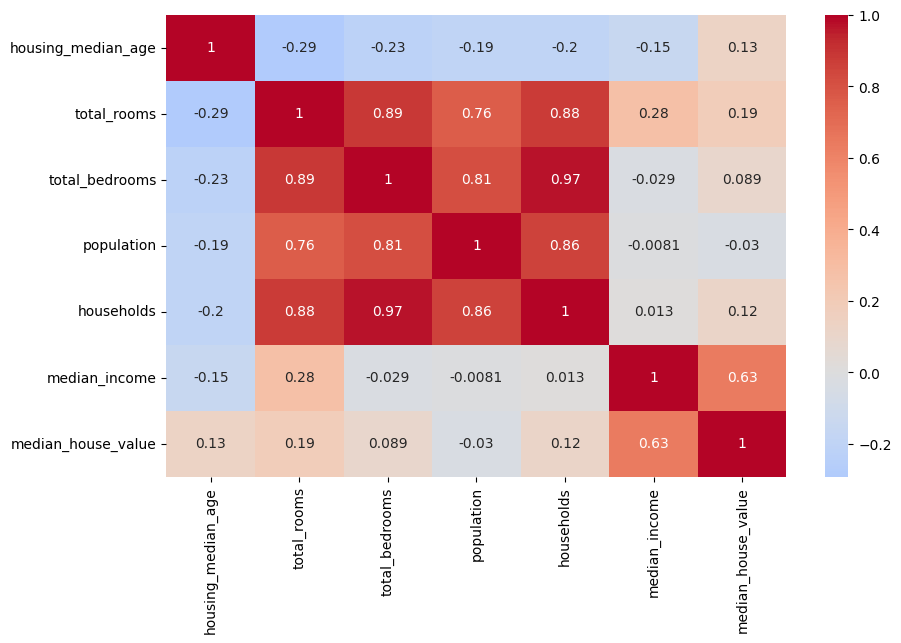

In [46]:
corr_matrix = df[cols].corr()
#corr_matrix
plt.figure(figsize = (10,6))
sns.heatmap(corr_matrix, annot = True, cmap = "coolwarm", center=0)
plt.show()

9. Con las columnas, realiza un gráfico pairplot empleando seaborn de python.

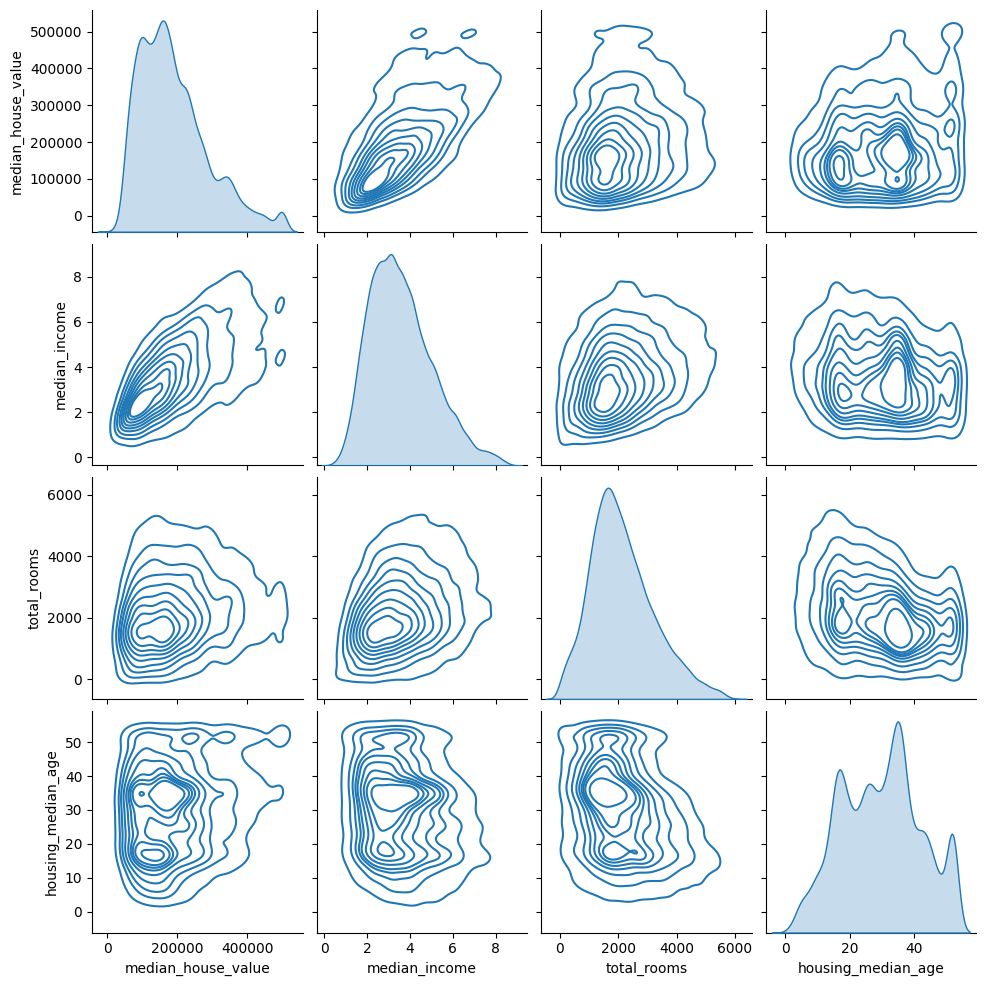

In [59]:
cols = ["median_house_value", "median_income", "total_rooms","housing_median_age"]
sns.pairplot(df[cols],kind="kde")

10. Realizaun scatter plot con la libreria sea born de python, el color del grafico puede ser empleado con la columna median_house_value

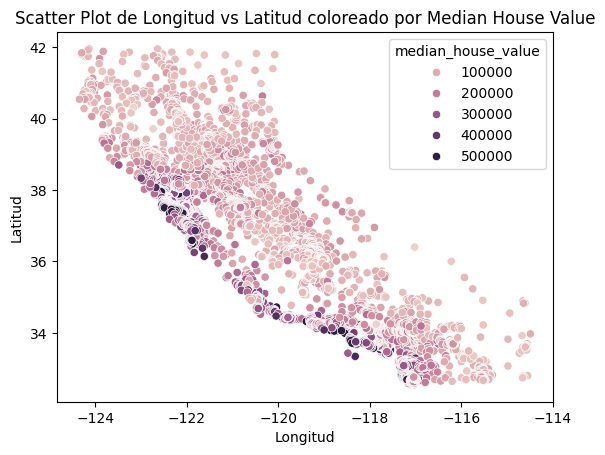

In [60]:
sns.scatterplot(data=df, x='longitude', y='latitude', hue='median_house_value')
plt.title('Scatter Plot de Longitud vs Latitud coloreado por Median House Value')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.show()

Las zonas costeras son más costosas 

11. ¿Las siguiente linea es adecuada para separar el dataframe en datos de entrenamiento de test?, ¿que pasa en la división de los datos?

In [61]:
from sklearn.model_selection import train_test_split

# ¿Es significativa la muestra que se esta considerando?
train_set, test_set \
  = train_test_split(df, test_size = 0.2, random_state = 42)

print(len(train_set))
print(len(test_set))

13995
3499


En primer lugar, es necesario conocer qué hace el bloque de código. Del método train_test_split, recibe estos parámetros:
Parameters
- *arrays : sequence of indexables with same length / shape[0]
Allowed inputs are lists, numpy arrays, scipy-sparse matrices or pandas dataframes.

- test_size : float or int, default=None
If float, should be between 0.0 and 1.0 and represent the proportion of the dataset to include in the test split. If int, represents the absolute number of test samples. If None, the value is set to the complement of the train size. If train_size is also None, it will be set to 0.25.

- train_size : float or int, default=None
If float, should be between 0.0 and 1.0 and represent the proportion of the dataset to include in the train split. If int, represents the absolute number of train samples. If None, the value is automatically set to the complement of the test size.

- random_state : int, RandomState instance or None, default=None
Controls the shuffling applied to the data before applying the split. Pass an int for reproducible output across multiple function calls. See Glossary <random_state>.

- shuffle : bool, default=True
Whether or not to shuffle the data before splitting. If shuffle=False then stratify must be None.

- stratify : array-like, default=None
If not None, data is split in a stratified fashion, using this as the class labels. Read more in the User Guide <stratification>.


Así, este codigo lo que hace es separar el 20% de los datos como un conjunto de prueba y deja el 80% para entrenamiento de los modelos, recibe el dataframe y fija la partición mediante random_state además de conservar todo lo que proviene del dataframe como índices y cosas así.

Ahora, respondiendo la pregunta, es sí, sí es una forma válida para separar los datos de entrenamiento y de entreno, sin embargo, eso no quiere decir que sea una buena o explícitamente adecuada, lo mejor y más recomendable es estratificar, según la tabla de correlación anteriormente calculada, lo más recomendable es estratificar por la variable median_income, ya que está fuertemente correlacionada con median_house_value y algunas otras. Con esta recomendación se garantiza que train y test mantienen las mismas proporciones de cada nivel de ingreso, generando una separación de los datos de forma más representativa y con métricas más confiables.

12. División del dataset en grupos:

La siguiente división puede ser realizada basada en la experticie de lo que se esta analizando, y sobre ello se debe tomar una muestra significativa. Una posible solución al problema puede ser la que probaremos a continuación.

<Axes: >

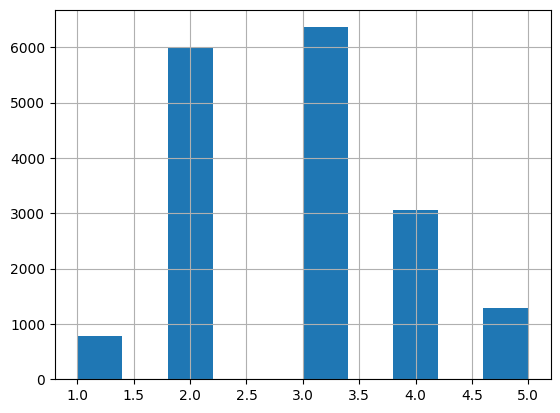

In [63]:
#Haciendo una mejor división de los datos

df["income_cat"] = pd.cut(df["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])


df.income_cat.hist()

In [64]:
df['income_cat']

0        5
1        4
2        4
3        4
4        3
        ..
17489    4
17490    5
17491    3
17492    5
17493    4
Name: income_cat, Length: 17494, dtype: category
Categories (5, int64): [1 < 2 < 3 < 4 < 5]

El codigo anterior está realizando una asignación por medio de estratificación según el ingreso de las personas, haciendo una estratificación de cinco niveles:

- Primer nivel (estrato 1): personas que ganan menos de 1500 dolares al mes.
- Segundo nivel (estrado 2): peronas qeu ganan entre 3000 y 1500 doláres al mes.
- Tercer nivel (estrato 3): personas que ganan entre 4500 y y 3000 dólares al mes.
- Cuarto nivel (estrato 4): personas que ganan entre 6000 y 4500 dólares al mes.
- Quinto nivel (estrado 5): personas que ganen más de 6000 dólare al mes. 

In [66]:
# Automatizando la división de los datos
# Librería desde scikitlearn
from sklearn.model_selection import StratifiedShuffleSplit

# StratifiedShuffleSplit, estratifica una vez dada la partición.
split = StratifiedShuffleSplit(n_splits = 1, test_size=0.2, random_state=42)

# n_splits = 1, fija las particiones independientes que se generan.

for train_index, test_index in split.split(df, df["income_cat"]):
# Divide el DataFrame df_ en las categorías de cada dato df_["Income Cat"] categoría indicada anteriormente

  strat_train_set = df.loc[train_index]
  strat_test_set = df.loc[test_index]


strat_train_set["income_cat"].value_counts() / len(strat_train_set)

strat_test_set["income_cat"].value_counts() / len(strat_test_set)


train_set, test_set \
  = train_test_split(df, test_size = 0.2, random_state = 7)

train_set["income_cat"].value_counts() / len(train_set)

income_cat
3    0.365702
2    0.340693
4    0.175706
5    0.073598
1    0.044302
Name: count, dtype: float64

In [67]:
def income_cat_proportions(data):
    return data["income_cat"].value_counts() / len(data)

train_set, test_set = train_test_split(df, test_size = 0.2, random_state = 42)

compare_props = pd.DataFrame({
    "Overall": income_cat_proportions(df),
    "Stratified": income_cat_proportions(strat_test_set),
    "Random": income_cat_proportions(test_set),
}).sort_index()
compare_props["Rand. %error"] =abs( 100 * compare_props["Random"] / compare_props["Overall"] - 100)
compare_props["Strat. %error"] =abs( 100 * compare_props["Stratified"] / compare_props["Overall"] - 100)

In [69]:
compare_props

,Overall,Stratified,Random,Rand. %error,Strat. %error
income_cat,,,,,
1,0.044244,0.044298,0.045442,2.707307,0.123476
2,0.343032,0.342955,0.362675,5.726334,0.022379
3,0.363610,0.363532,0.350386,3.637013,0.021436
4,0.175146,0.175193,0.168905,3.562954,0.026919
5,0.073968,0.074021,0.072592,1.860324,0.071559


13. Puedes agregar nuevas variables al dataframe para el análisis, por ejemplo:

´´´
df_train["rooms_per_household"] = df_train["total_rooms"]/df_train["households"]
df_train["bedrooms_per_room"] = df_train["total_bedrooms"]/df_train["total_rooms"]
df_train["population_per_household"]=df_train["population"]/df_train["households"]
´´´


In [71]:
# Codigos para limpieza de datos:

#df_train.dropna(subset=["total_bedrooms"]) #Eliminar los nan
#df_train.drop("total_bedrooms", axis=1)  # Eliminar la columna
median = df["total_bedrooms"].median()
q=df["total_bedrooms"].fillna(median).copy()

In [82]:
train_set["rooms_per_household"] = train_set["total_rooms"]/train_set["households"]
train_set["bedrooms_per_room"] = train_set["total_bedrooms"]/train_set["total_rooms"]
train_set["population_per_household"]=train_set["population"]/train_set["households"]


# Primera metodología
median = train_set["total_bedrooms"].median()
q = train_set["total_bedrooms"].fillna(median).copy()


q =  pd.DataFrame(q)

q.isnull().sum()
# Segunda metodología:

total_bedrooms    0
dtype: int64

In [85]:

mask_null = df.isnull()
p = train_set.dropna(subset=["total_bedrooms"]).copy()
from sklearn.impute import SimpleImputer
# imputer = Imputer(strategy="median")

df_train_num = train_set.drop("ocean_proximity", axis=1)

imp_mean = SimpleImputer( strategy='mean')

imp_mean.fit(df_train_num)

imp_mean.statistics_

array([-1.19622451e+02,  3.56931383e+01,  2.96085030e+01,  2.15417135e+03,
        4.48302608e+02,  1.19992040e+03,  4.19193998e+02,  3.60080354e+00,
        1.91393918e+05,  2.89932119e+00,  5.30337250e+00,  2.15660794e-01,
        2.94844170e+00])

14. Compara las siguientes variables:
imp_mean.statistics_
df_train_num.median()
Constuye la matriz de características:

X = imp_mean.transform(df)
housing_tr = pd.DataFrame(X, columns=df_train_num.columns)

15. Manejo de texto y atributos categóricos.

Explicar el codigo:

from sklearn.preprocessing import OneHotEncoder
df_train["ocean_proximity"].unique()
housing_cat=df_train[["ocean_proximity"]]
housing_cat

cat_encoder = OneHotEncoder(sparse_output=False)
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
print(housing_cat_1hot)
print(cat_encoder.categories_)


df_cat_1hot = pd.DataFrame(housing_cat_1hot, columns = cat_encoder.categories_[0])

housing_tr_ = housing_tr.join(df_cat_1hot)

In [92]:
from sklearn.preprocessing import OneHotEncoder

train_set["ocean_proximity"].unique()
housing_cat=train_set[["ocean_proximity"]]
housing_cat

cat_encoder = OneHotEncoder(sparse_output=False)
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
print(housing_cat_1hot)
print(cat_encoder.categories_)


df_cat_1hot = pd.DataFrame(housing_cat_1hot, columns = cat_encoder.categories_[0])

housing_tr_ = housing_tr.join(df_cat_1hot)

[[0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 ...
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1.]]
[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype=object)]


- from sklearn.preprocessing import OneHotEncoder: importa el codificador one-how de scikit-leanr
- df_train["ocean_proximity"].unique() Muestra las categorias distintas de la columna categórica "ocean_proximity".
- housing_cat = df_train[["ocean_proximity"]]: Extrae la columna como dataframe bidimensional, que es lo que requiere OneHotEncoder
- cat_encoder = OneHotEncoder(...) crea el codificador, sparce_output=False, pide salida densa (un ndarray), no matriz dispersa.
- housing_cat_1hot = cat_encoder.fit_transform(housing_cat): Ajusta el encoder a las categorías que hay en train y transforma a matriz one-hot (filas = muestras, columnas = categorías).
- print(housing_cat_1hot) y print(cat_encoder.categories_): Imprime la matriz one-hot y el orden de categorías aprendido (define el orden de columnas).
- df_cat_1hot = pd.DataFrame(housing_cat_1hot, columns=cat_encoder.categories_[0]): Convierte la matriz a DataFrame con nombres de columna = categorías (en ese orden).
- housing_tr_ = housing_tr.join(df_cat_1hot): Une (por índice) las columnas one-hot al DataFrame housing_tr


### Escalamiento de variables:

16. Las variables pueden ser escaladas como sigue:

In [93]:
cols=["longitude", "latitude",    "housing_median_age",    "total_rooms",\
      "total_bedrooms",    "population",    "households",    "median_income",\
      "<1H OCEAN",    "INLAND",    "ISLAND",    "NEAR BAY", "NEAR OCEAN"]


housing_scale=housing_tr_[cols]
housing_scale

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(housing_scale)

X = scaler.transform(housing_scale)

housing_prepared = pd.DataFrame(X, columns = housing_scale.columns)

17. Para todos los pasos anteriores, construye ordenadamente los pasos limpieza, escalamiento de variables, manejo de texto y atributos categóricos para tener el data frame listo para el análisis. Recuerda dividir el data frame en datos de entrenamiento y de test con la correcta estractificación. Genera dos data frame: housing_train, housing_test, cada una, debe tener las caracteristicas y los datos etiquetados.

In [96]:
from sklearn.preprocessing import StandardScaler
# 1. Estratificación y división
housing = df.copy()
housing["income_cat"] = pd.cut(housing["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

#1.5 Definir los datos de entrenamiento y de testeo
for train_idx, test_idx in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_idx].drop("income_cat", axis=1)
    strat_test_set = housing.loc[test_idx].drop("income_cat", axis=1)

# 2. Separar numéricas y categóricas
housing_train_num = strat_train_set.drop("ocean_proximity", axis=1)
housing_test_num = strat_test_set.drop("ocean_proximity", axis=1)

# 3. Quitar valores faltantes
imputer = SimpleImputer(strategy="median")
imputer.fit(housing_train_num)
housing_train_num_imputed = pd.DataFrame(imputer.transform(housing_train_num),
                                        columns=housing_train_num.columns,
                                        index=housing_train_num.index)
housing_test_num_imputed = pd.DataFrame(imputer.transform(housing_test_num),
                                       columns=housing_test_num.columns,
                                       index=housing_test_num.index)

# 4. Crear variables derivadas
for dataset in [housing_train_num_imputed, housing_test_num_imputed]:
    dataset["rooms_per_household"] = dataset["total_rooms"] / dataset["households"]
    dataset["bedrooms_per_room"] = dataset["total_bedrooms"] / dataset["total_rooms"]
    dataset["population_per_household"] = dataset["population"] / dataset["households"]

# 5. Escalamiento
scaler = StandardScaler()
housing_train_scaled = pd.DataFrame(scaler.fit_transform(housing_train_num_imputed),
                                   columns=housing_train_num_imputed.columns,
                                   index=housing_train_num_imputed.index)
housing_test_scaled = pd.DataFrame(scaler.transform(housing_test_num_imputed),
                                  columns=housing_test_num_imputed.columns,
                                  index=housing_test_num_imputed.index)

# 6. Codificar variable categórica
housing_train_cat = pd.get_dummies(strat_train_set[["ocean_proximity"]], drop_first=True)
housing_test_cat = pd.get_dummies(strat_test_set[["ocean_proximity"]], drop_first=True)

# Alinear columnas (por si acaso alguna categoría falta en test)
housing_test_cat = housing_test_cat.reindex(columns=housing_train_cat.columns, fill_value=0)

# 7. Unir numéricas y categóricas
housing_train_final = pd.concat([housing_train_scaled, housing_train_cat], axis=1)
housing_test_final = pd.concat([housing_test_scaled, housing_test_cat], axis=1)

# 8. Agregar variable objetivo (etiqueta)
housing_train_final["median_house_value"] = strat_train_set["median_house_value"]
housing_test_final["median_house_value"] = strat_test_set["median_house_value"]

housing_test_final.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
4619,0.870611,-0.829945,-0.700737,0.949703,-0.004809,0.354539,0.243262,2.200868,280300.0,0.636654,-1.357712,0.065768,False,0,False,False
4755,0.970160,-1.033507,-0.945822,-0.436332,-0.799421,-0.688544,-0.788409,1.230410,300000.0,0.528904,-0.981051,0.091483,False,0,False,False
13372,-1.299565,0.969731,0.851466,-1.127504,-1.124489,-1.049421,-1.143655,-1.538887,113300.0,-0.109852,-0.032841,0.108804,False,0,True,False
15746,1.243921,-1.361983,-1.190906,0.479078,1.245801,0.987310,1.104610,-0.987109,106700.0,-0.507118,0.996678,-0.151916,False,0,False,True
9197,-1.523551,1.520275,-0.210568,0.136722,0.270596,-1.112039,-0.803008,-0.956911,109700.0,1.618337,0.091447,-0.820933,True,0,False,False


18. y 19. ¿que puede concluir respecto al modelo empleado? ¿El modelo de regresión lineal es valido para lo construido,

In [99]:
#Proposición de un modelo lineal
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
model = LinearRegression()
model.fit(housing_train_final.drop("median_house_value", axis=1), housing_train_final["median_house_value"])

#Evaluar el modelo
housing_test_X = housing_test_final.drop("median_house_value", axis=1)
housing_test_y = housing_test_final["median_house_value"]
housing_predictions = model.predict(housing_test_X)

#Calular R2 y RMSE
mse = mean_squared_error(housing_test_y, housing_predictions)
rmse = np.sqrt(mse)
r2 = r2_score(housing_test_y, housing_predictions)

print("RMSE:", rmse)
print(r"$R^2$:", r2)

RMSE: 58093.37258494922
$R^2$: 0.6592679328513582


El modelo lineal no desempeña bien. Un RMSE alto indica que las predicciones se alejan demasiado, algo crítico si hablamos de precios de vivienda. El R² ≈ 0.66 muestra que el modelo recoge cerca del 66% de la variación del precio, sin embargo deja un 34% sin considerar, no captura de forma fina. Aunque sirve para ver posibles tendencias lineales entre las variables, no es suficiente preciso para predicciones en este proyecto, por lo que no resulta el enfoque más adecuado en términos de la complejidad que presentan los datos del modelo.

20. y 21. ¿qué informacion nos da el score? ¿Puede ser ajustado a otro modelo?

El score habla de la tendencia que sigue un conjunto de datos, por lo que si es lineal está el $R^2$ mientras que para otras distribuciones se tienen otros índices. En este caso sí, siempre se puede ajustar a otro modelo, el problema estará enfocado a analizar qué tan bien reproduce ese modelo la tendencia que siguen los datos. 


Pasos

1. Separar features y target
2. Separar los datos en train/test (o CV)
3. Identificar columnas numéricas y categóricas
4. Definir transformaciones (imputar/escalar/one-hot)
5. Combinar transformaciones con `ColumnTransformer`
6. Elegir el modelo (estimador final)
7. Armar el `Pipeline([("prep", pre), ("model", estimador)])`
8. Entrenar con `fit(X_train, y_train)`
9. Predecir/Evaluar con `predict/score` sobre test

En código sería algo así:

```python
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
import joblib
import numpy as np

# 1) X, y
X = df.drop(columns="median_house_value")
y = df["median_house_value"]

# 2) split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 3) columnas
num_cols = X_train.select_dtypes(include=np.number).columns
cat_cols = X_train.select_dtypes(exclude=np.number).columns

# 4) transformaciones
num_pipe = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])
cat_pipe = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

# 5) ColumnTransformer
pre = ColumnTransformer([
    ("num", num_pipe, num_cols),
    ("cat", cat_pipe, cat_cols)
])

# 6–7) Pipeline completo
pipe = Pipeline([
    ("prep", pre),
    ("model", Ridge())          # En esta línea se elige el modelo
])

# 8) entrenar
pipe.fit(X_train, y_train)

# 9) predecir/evaluar
y_pred = pipe.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"RMSE: {rmse:.2f}")

```
